# Red Round Sign Detection

#### Submitted by Rishabh Bhardwaj

## Part 1 - Dataset

The GTSB dataset contains 900 (600 train and 300 test) images (1360 * 800 pixels) in PPM format.Each image consists of 0 to 6 traffic signs, the size of which varies from 16 * 16 to 128 * 128.
Along with this,  a ground truth csv file is provided which contains trafiic sign ROI (topmost, upmost, rightmost, and downmost) columns with the class label of the traffic sign.

Total Number of classes:  43
Top 20 classes distribution with Number of samples


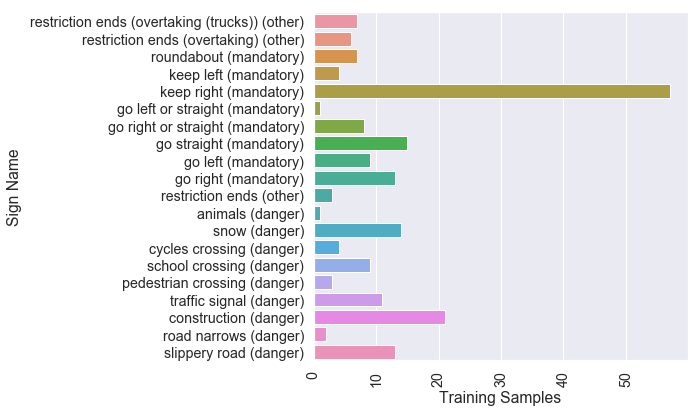

In [2]:
from utils import DataInfo, DataAugmentation
data_info = DataInfo()
%matplotlib inline
#Getting data info
data_info.class_info()

As we can see from above plot that there a class imbalance. The high number of instances are available for common sign boards across the streets. 
Since the task is here for detection so the varying sizes of bounding boxes are not of a much concerns. A deep neural network model (like YOLO) will be able to handle varying sign sizes in the input images.
But the different lighting and weather is one of the major concern.
The below analysis uses PyTorch. A Dataset is created for GTSB data, and multiple transforms on the data (data augmentation) is done using dataloaders.

To handle different lighting and weather conditions, each image is tranformed with random brightness, contrast, saturation and hue value. Below code creates the dataset with all the images (with their transformations),

In [3]:
from dataset import GermanTrafficSignDataset
import torch
data_augmentation = DataAugmentation()

# Get transforms for brightness, contarst, saturation and hue
all_transforms = data_augmentation.get_transforms()

# Get Datasests by applying the above transforms
all_datasets = [GermanTrafficSignDataset(gt_file='data/TrainIJCNN2013/gt.txt',root_dir='data/train', transform = t) for t in all_transforms]

# Generate data loaders with batch size and workers for parallelism
all_loaders = [torch.utils.data.DataLoader(curr_data,batch_size=4, shuffle=False,num_workers=1) for curr_data in all_datasets]

Visualizing a single image with the transform images,

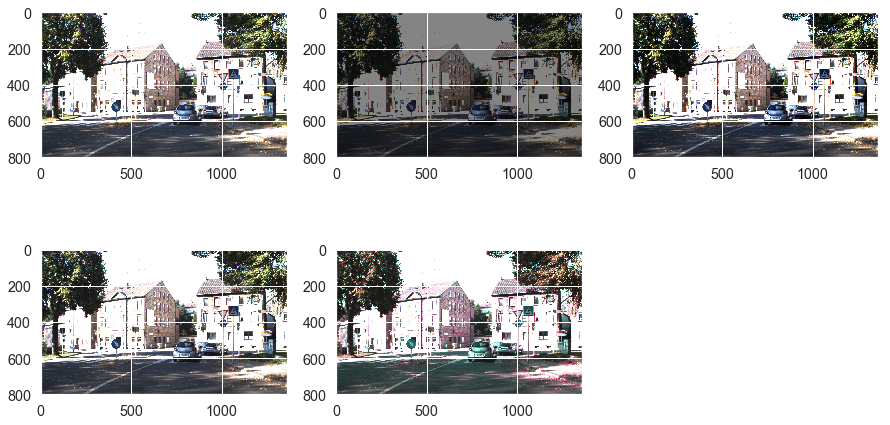

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (15,8))
j=1
for loader in all_loaders:
    for i, curr_data in enumerate(loader):
        curr_img = curr_data['img'][1]
        curr_img = np.transpose(curr_img.numpy(), (1, 2, 0))
        plt.subplot(2,3,j)
        j = j + 1
        plt.imshow(curr_img)
        if i == 0:
            break;
plt.show()

Applying these transformations helps us in __handling different lighting and weather conditions__.



The size of the data is another concern. Since each input image size is (1360X800X3) so the input layer is quite huge,
Below are the methods to handle the data size issue:


  * __Process data in batches__: 
    The Dataloader (and Datset) created above has the ability to process the data in mini-batches.Though this will solve the problem of having all the data at once in memory, but still the input layer size of the model is big. This is implemented currently in the code (mini-batch size is a hyper-parameter)
    
    
  *  __Resizing the input images__:
     Decreasing resolution of image is one another option to handle this. The challenge here is to relatively change the ROI columns given in the test sample. This is currently work in progress.

#### Code: 
[Github](https://github.com/rishabhbhardwaj/SignDetection)    (https://github.com/rishabhbhardwaj/SignDetection)